In [1]:
import pandas as pd
import datetime  
import numpy as np
from LunarSolarConverter.LunarSolarConverter import LunarSolarConverter, Lunar, Solar
from matplotlib import pyplot as plt
import seaborn as sns
import pylab
%matplotlib inline
np.random.seed(7)

In [2]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, lasso_path, enet_path

In [3]:
ctis = pd.read_csv('/mnt/d/ctis2.csv', sep='|')
converter = LunarSolarConverter()
ctis['date'] = pd.to_datetime(ctis['appg_date'], format='%Y%m%d', errors='ignore')
ctis['day'] = ctis['date'].dt.day
ctis['month'] = ctis['date'].dt.month
ctis['weekday'] = ctis['date'].dt.dayofweek
ctis['Solar'] = ctis['date'].map(lambda date: Solar(date.year, date.month, date.day))
ctis['Lunar'] = ctis['Solar'].map(lambda date: converter.SolarToLunar(date))
ctis['LunarDay'] = ctis['Lunar'].map(lambda date: date.lunarDay)
ctis['LunarMonth'] = ctis['Lunar'].map(lambda date: date.lunarMonth)
ctis['day1_amt'] = ctis['amt'].shift(1)
ctis['day2_amt'] = ctis['amt'].shift(2)

In [4]:
ctis = ctis.dropna()
normed = normalize(ctis[['day', 'month', 'weekday', 'LunarDay', 'LunarMonth', 'day1_amt', 'day2_amt']].values, norm='l2')
#normed = ctis[['day', 'month', 'weekday', 'LunarDay', 'LunarMonth', 'day1_amt', 'day2_amt']].values
ctis['day'] = normed[:,0]
ctis['month'] = normed[:,1]
ctis['weekday'] = normed[:,2]
ctis['LunarDay'] = normed[:,3]
ctis['LunarMonth'] = normed[:,4]
ctis['day1_amt'] = normed[:,5]
ctis['day2_amt'] = normed[:,6]

In [5]:
test = ctis.sort_values(by='date')['amt'].values

In [6]:
from scipy.signal import medfilt

pylab.rcParams['figure.figsize'] = (14, 5)

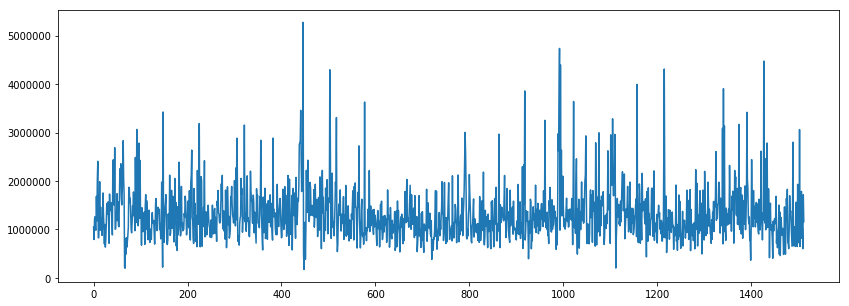

In [7]:
plt.plot(test)

In [8]:
X = ctis[['day', 'month', 'weekday', 'LunarDay', 'LunarMonth', 'day1_amt', 'day2_amt']].values
y = ctis['amt']

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train,y_train)

lg = LinearRegression()
lg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

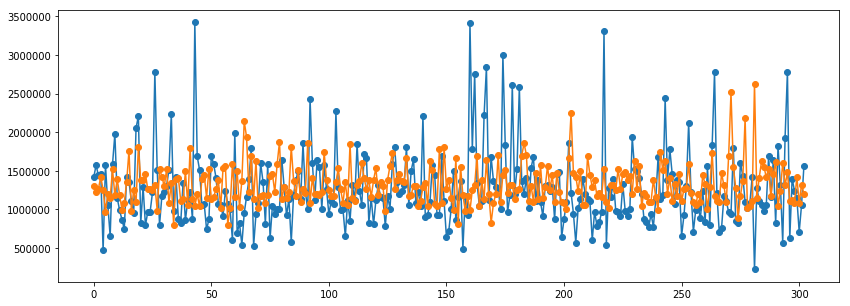

In [22]:
y_predict = knn.predict(X_test)
plot = plt.figure()
pylab.rcParams['figure.figsize'] = (14, 5)

plt.plot(y_test.values, 'o-')
plt.plot(y_predict, 'o-')